In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# load data

In [4]:
calif=pd.read_csv('Califcrime.csv')

In [33]:
calif.head()

,City_name,Popul,Cri_index,tot_cri_index,Mur_mans,For_rape,Robbery,Agg_assault,Burglary,Lar_theft,Moto_theft,Arson
0,Adelanto,15515,361,363,2,2,5,117,120,68,47,2
1,Agoura Hills,21127,290,290,0,3,5,48,64,155,15,0
2,Alameda,79848,2933,2950,0,12,91,146,323,2022,339,17
3,Albany,17457,736,742,0,1,37,12,169,462,55,6
4,Alhambra,85356,2042,2057,4,3,165,97,372,1114,287,15


In [34]:
calif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City_name      335 non-null    object
 1   Popul          335 non-null    int64 
 2   Cri_index      335 non-null    int64 
 3   tot_cri_index  335 non-null    int64 
 4   Mur_mans       335 non-null    int64 
 5   For_rape       335 non-null    int64 
 6   Robbery        335 non-null    int64 
 7   Agg_assault    335 non-null    int64 
 8   Burglary       335 non-null    int64 
 9   Lar_theft      335 non-null    int64 
 10  Moto_theft     335 non-null    int64 
 11  Arson          335 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 31.5+ KB


In [35]:
calif.describe()

,Popul,Cri_index,tot_cri_index,Mur_mans,For_rape,Robbery,Agg_assault,Burglary,Lar_theft,Moto_theft,Arson
count,3.350000e+02,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.00000,335.000000
mean,7.721034e+04,3088.797015,3120.367164,4.794030,22.394030,160.898507,326.391045,510.014925,1639.686567,424.61791,31.570149
std,2.226119e+05,10305.060281,10438.725472,24.569271,79.030578,835.490470,1735.517091,1366.483773,4835.064418,1560.75220,139.451987
min,1.001600e+04,72.000000,72.000000,0.000000,0.000000,0.000000,0.000000,16.000000,48.000000,4.00000,0.000000
25%,2.285750e+04,646.500000,648.000000,0.000000,4.000000,15.000000,51.000000,131.500000,358.500000,50.50000,3.000000
50%,4.084300e+04,1333.000000,1338.000000,1.000000,9.000000,41.000000,105.000000,246.000000,714.000000,132.00000,9.000000
75%,7.341000e+04,2580.000000,2594.000000,3.000000,19.000000,100.000000,221.500000,462.000000,1407.500000,332.00000,21.000000
max,3.650138e+06,167495.000000,169802.000000,425.000000,1288.000000,14411.000000,30716.000000,21521.000000,74457.000000,24677.00000,2307.000000


# data cleaning

In [36]:
calif.isnull().sum()

City_name        0
Popul            0
Cri_index        0
tot_cri_index    0
Mur_mans         0
For_rape         0
Robbery          0
Agg_assault      0
Burglary         0
Lar_theft        0
Moto_theft       0
Arson            0
dtype: int64

# fill only the numeric columns with the median

In [37]:
calif_numeric = calif.select_dtypes(include=[np.number])  # Select numeric columns only
calif[calif_numeric.columns] = calif_numeric.fillna(calif_numeric.median())

In [38]:
calif.drop_duplicates(inplace=True)

# exploring data

# scatter plot on crime index vs population

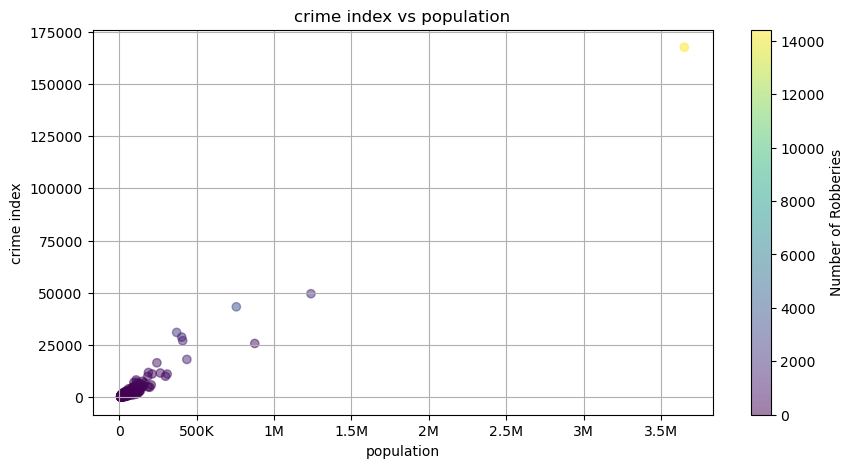

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(calif['Popul'], calif['Cri_index'], c=calif['Robbery'], cmap='viridis', alpha=0.5)
plt.title('crime index vs population')
plt.xlabel('population')
plt.ylabel('crime index')
plt.xticks([0, 500_000, 1_000_000, 1_500_000, 2_000_000, 2_500_000, 3_000_000, 3_500_000], 
           ['0', '500K', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M'])
plt.colorbar(label='Number of Robberies')
plt.grid(True)
plt.show()

In [51]:
calif['tot_cri_index'] = calif[crime_types].sum(axis=1)
crime_threshold = calif['tot_cri_index'].median()
high_crime_cities = calif[calif['tot_cri_index'] > crime_threshold]

# plottig cities with higher crime vs crime index (bar)

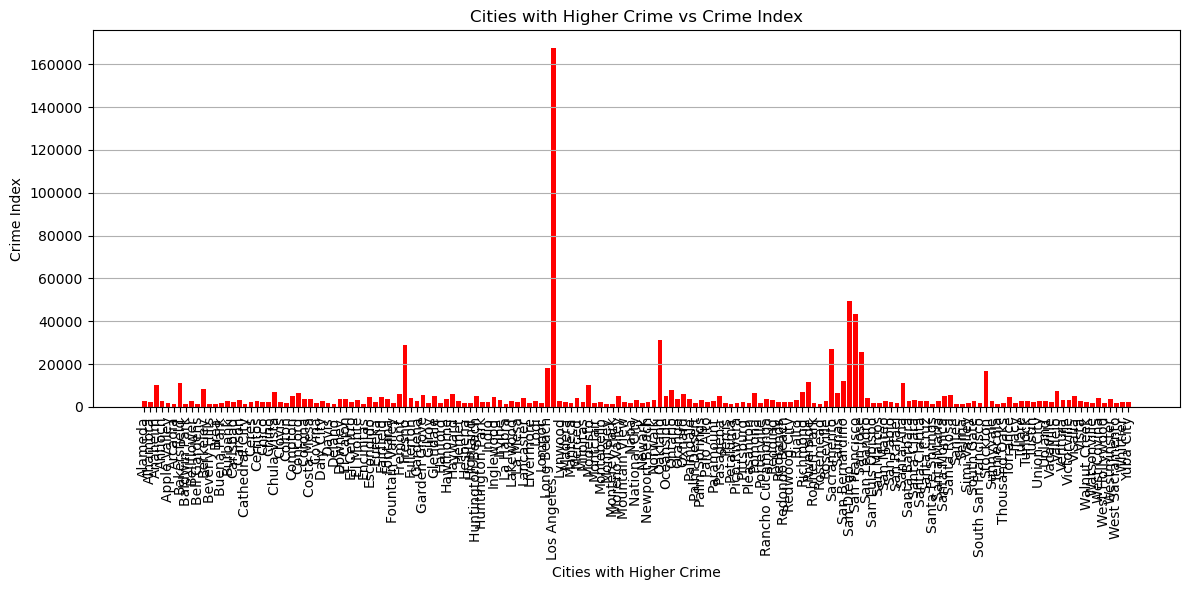

In [53]:
plt.figure(figsize=(12, 6))
plt.bar(high_crime_cities['City_name'], high_crime_cities['Cri_index'], color='red')
plt.title('Cities with Higher Crime vs Crime Index')
plt.xlabel('Cities with Higher Crime')
plt.ylabel('Crime Index')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# barchat showing the crime vs number of incidents

In [44]:
crime_types=['Mur_mans','For_rape','Robbery','Agg_assault','Burglary','Lar_theft','Moto_theft','Arson']
total_crimes=calif[crime_types].sum()

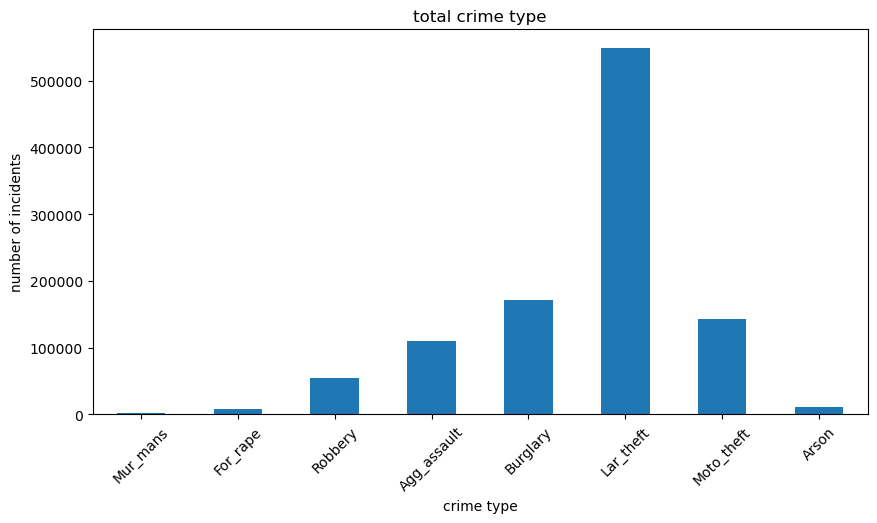

In [45]:
plt.figure(figsize=(10,5))
total_crimes.plot(kind='bar')
plt.title('total crime type')
plt.xlabel('crime type')
plt.ylabel('number of incidents')
plt.xticks(rotation=45)
plt.show()

# corelation analysis

In [46]:
correlation_matrix=calif[['Popul','Cri_index','tot_cri_index','Mur_mans','For_rape','Robbery','Agg_assault','Burglary','Lar_theft','Moto_theft','Arson']].corr()


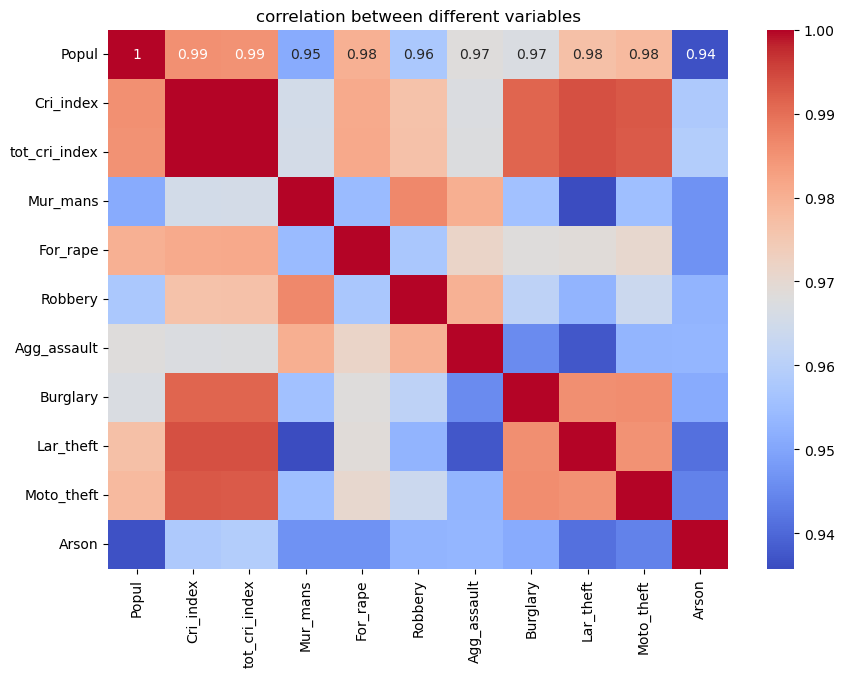

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('correlation between different variables')
plt.show()

In [22]:
features=calif[['Popul','Mur_mans','For_rape','Robbery','Agg_assault','Burglary','Lar_theft','Moto_theft','Arson']]
target=calif['tot_cri_index']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [24]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

# make prediction

In [25]:
y_pred=model.predict(X_test)
print(y_pred)

[ 1278.94   403.79  1089.88 32739.59   841.91   780.42   197.27   385.53
  2989.41  7519.     793.74   906.66 13937.3   7211.83   348.65  6445.14
  1457.42  3229.38   971.75  4263.35  1795.86  3430.98   958.97  2100.96
  9514.66   605.09  3510.86  5775.2   1064.13   556.53   917.61   404.16
   805.63  6302.91   192.48   547.27  3885.79  1310.72  3857.54   945.25
   571.11   915.95  2348.18  1808.99  1279.02  1549.49   691.23  1628.71
  3507.91   326.21  3110.78   489.1   4391.64 42017.94   531.59   246.88
   705.31   720.45  2405.7    733.37   246.37  3553.38 16344.04   943.54
  2888.84   840.04  1721.73]


In [26]:
mse=mean_squared_error(y_test,y_pred)
print(f'\nMean Squared Error: {mse}')


Mean Squared Error: 243893620.3078179


<function matplotlib.pyplot.show(close=None, block=None)>

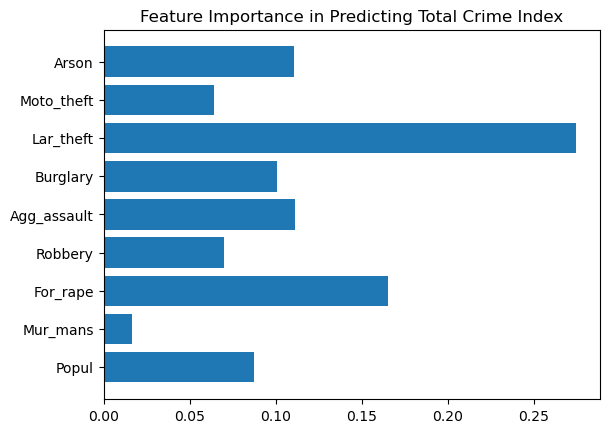

In [31]:
plt.barh(features.columns,model.feature_importances_)
plt.title('Feature Importance in Predicting Total Crime Index')
plt.show

In [28]:
correlation = calif['Popul'].corr(calif['Agg_assault'])
print(f"Correlation between Population and Rape Incidents: {correlation}")

Correlation between Population and Rape Incidents: 0.9682540233750876


In [29]:
comparison = X_test.copy()  # Copying the test input data
comparison['Actual'] = y_test  # Adding actual total crime index
comparison['Predicted'] = y_pred  # Adding predicted total crime index
print(comparison.head(50))

      Popul  Mur_mans  For_rape  Robbery  Agg_assault  Burglary  Lar_theft  \
25    45033         5        11      144          203       286        457   
109   12067         0         6        5           32        65        256   
76    15295         3        25       40          202       418        432   
196  371234        60       305     2190         3199      5094      15437   
57    22920         0        19       24          126       250        346   
255   34722         0         4       24          101       162        385   
182   18634         0         0        0            7        38        142   
181   30430         1         2       13           37       121        185   
274  128862         2        19       79          388       508       1435   
198  149344         9        44      285          668      1172       4204   
72    34958         0         2       12           37       156        474   
9     16401         0         4       14           21       131 